In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Objective

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

You may find more inforamtion here: https://www.kaggle.com/competitions/titanic/overview

# Load the data

In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)
dfs = [df_train, df_test]

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

submission = pd.read_csv('gender_submission.csv')

# Data Available

You may find more information here: https://www.kaggle.com/competitions/titanic/data?select=gender_submission.csv

| Variable	| Definition | 	Key | 
|:---------:|:----------:|:----:|
|survival |	Survival |	0 = No, 1 = Yes|
|pclass	| Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex |	Sex	||
|Age |	Age in years|	|
|sibsp |	# of siblings / spouses aboard the Titanic	||
|parch |	# of parents / children aboard the Titanic	||
|ticket |	Ticket number	||
|fare |	Passenger fare	||
|cabin |	Cabin number||	
|embarked |	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()
# il manque des données sur la colonne d'Age,de Cabin et d'Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




# Data Analysis

Seaborn: https://seaborn.pydata.org/examples/index.html
matplotlib: https://matplotlib.org/stable/gallery/index

Pandas (data managment): https://pandas.pydata.org/

# Pourcentage de survie

0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'percent')

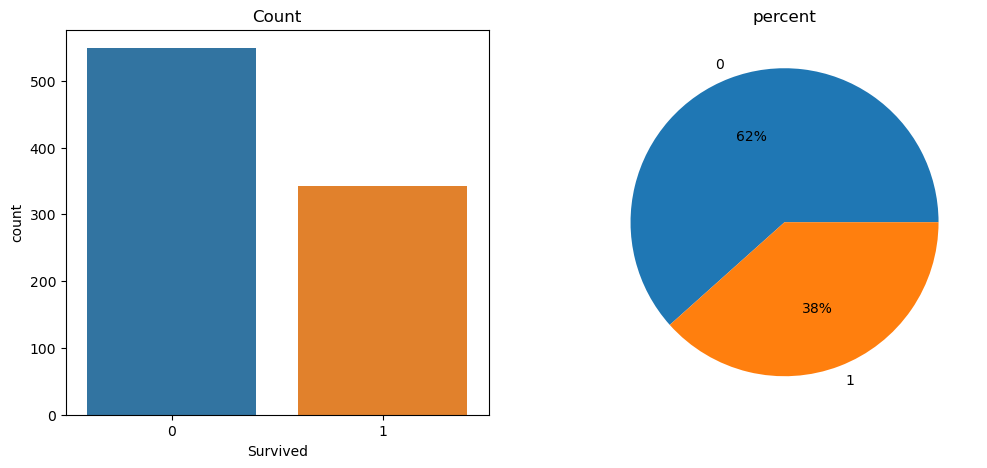

In [8]:
Survived_freq=df_train.Survived.value_counts()
print(Survived_freq)

%matplotlib inline
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x='Survived',data=df_train)
plt.title('Count')
plt.subplot(122)
plt.pie(Survived_freq,labels=Survived_freq.index,autopct='%1.0f%%')
plt.title('percent')

<Figure size 640x480 with 0 Axes>

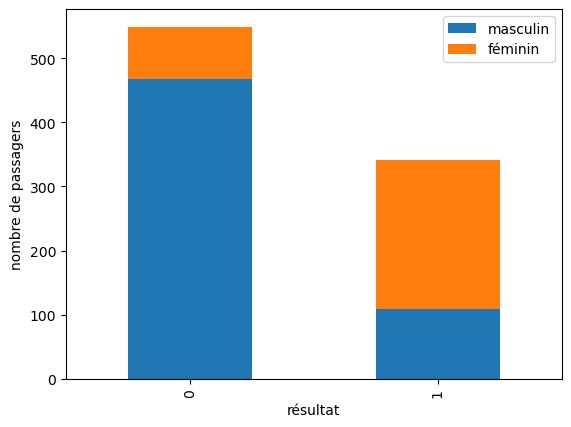

In [9]:
fig = plt.figure()
Survived_m = df_train.Survived[df_train.Sex == 'male'].value_counts()
Survived_f = df_train.Survived[df_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'masculin':Survived_m, u'féminin':Survived_f})
df.plot (kind = 'bar',stacked = True)
plt.xlabel(u'résultat')
plt.ylabel(u'nombre de passagers')
plt.show()

In [10]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


# Nombre des passagers vivants dans chaque class

In [11]:
# Nombre des passagers vivants dans chaque class
df_train.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

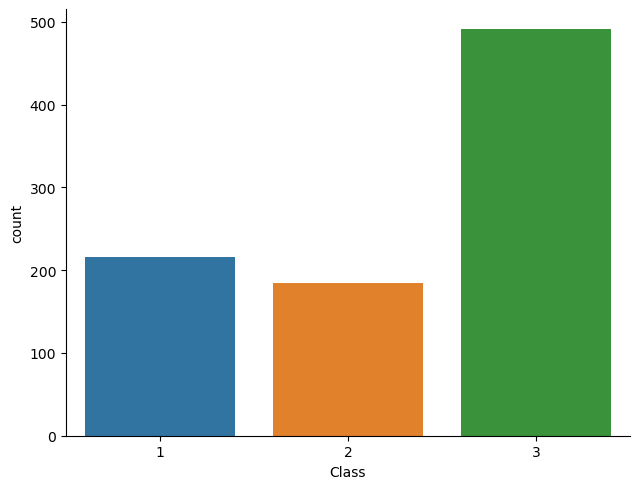

In [12]:
pclass = sns.catplot('Pclass', data=df_train, kind='count', aspect=1.3)
pclass.set_xlabels('Class')

# On ajoute une colonne Personne dans le tableau

In [13]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [14]:
df_train['person'] = df_train[['Age', 'Sex']].apply(male_female_child, axis=1)

In [15]:
df_train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


# L'annalyse d'ages

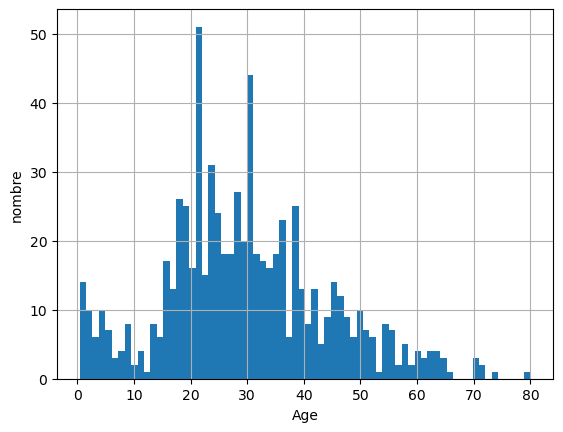

In [16]:
df_train['Age'].hist(bins=70)
plt.ylabel(u'nombre')
plt.xlabel(u'Age')
plt.show()

In [17]:
# On ignore les cabins manquants
deck = df_train['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [19]:
deck.count()

204

# L'analyse des cabins

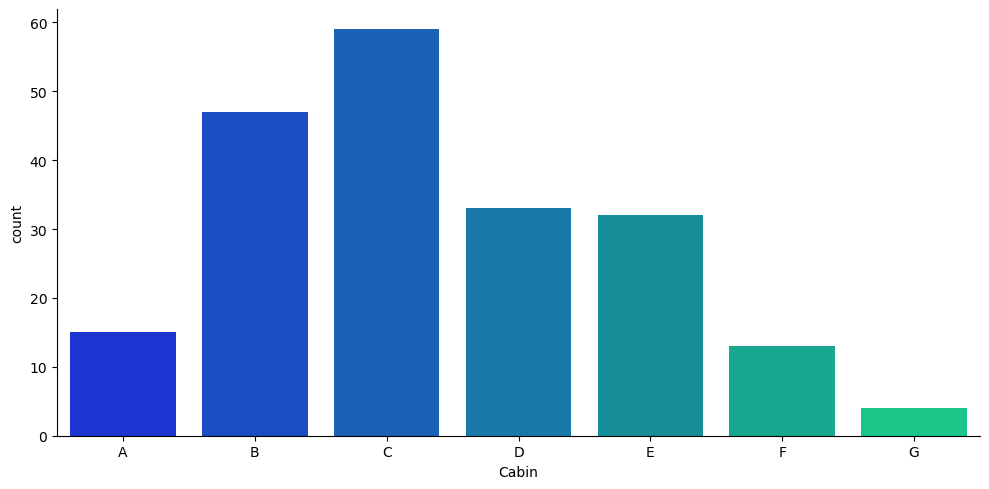

In [20]:
# on prend la première lettre des cabins
levels = []

for level in deck:
    levels.append(level[0])

    
#factorplot the cabins
cabin_df = DataFrame(levels)
cabin_df.columns=['Cabin']
sns.catplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G'], aspect=2, 
              palette='winter')

# L'analyse des ports d'embarquement

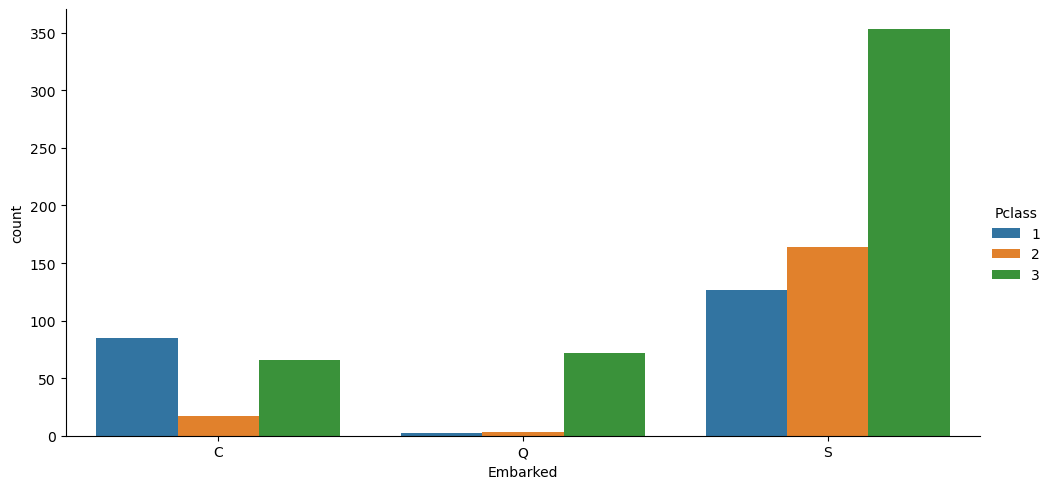

In [21]:
sns.catplot('Embarked',data=df_train,kind='count', hue='Pclass',order=['C','Q','S'],aspect=2) 

In [22]:
df_train[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [23]:
# sibsb+parch pour vérifier si la personne est toute seule
df_train ['Situation'] =df_train.SibSp + df_train.Parch

In [24]:
df_train['Situation'].head()

0    1
1    1
2    0
3    1
4    0
Name: Situation, dtype: int64

In [25]:
# On remplace les cases de 'Alone' par leurs situations
df_train['Situation'].loc[df_train['Situation']>0] = 'With family'
df_train['Situation'].loc[df_train['Situation']==0] = 'Alone'

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Situation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


# L'analyse de situation familiale dans le bateau

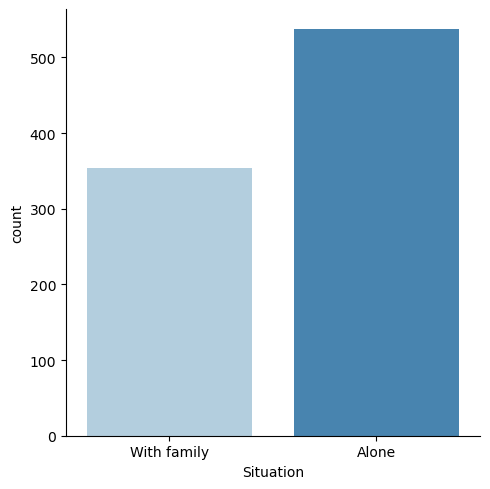

In [27]:
sns.factorplot('Situation',data=df_train,kind='count',palette='Blues')

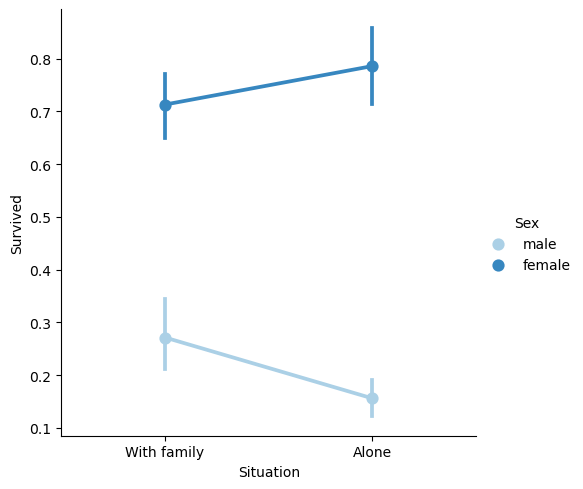

In [28]:
# situation familiale et sexe
sns.factorplot('Situation','Survived',data=df_train,hue='Sex',palette='Blues')

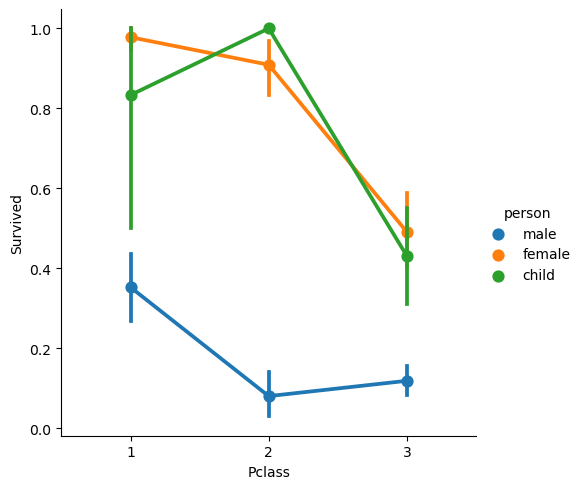

In [29]:
# class et sexe
sns.factorplot('Pclass','Survived',hue='person',data=df_train)

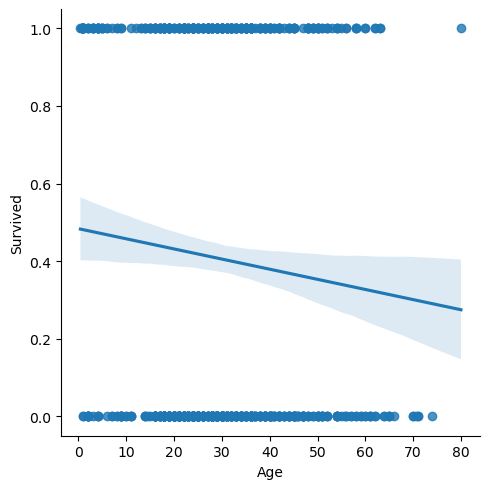

In [30]:
# age
sns.lmplot('Age','Survived',data=df_train)
# older, the less likely to survive

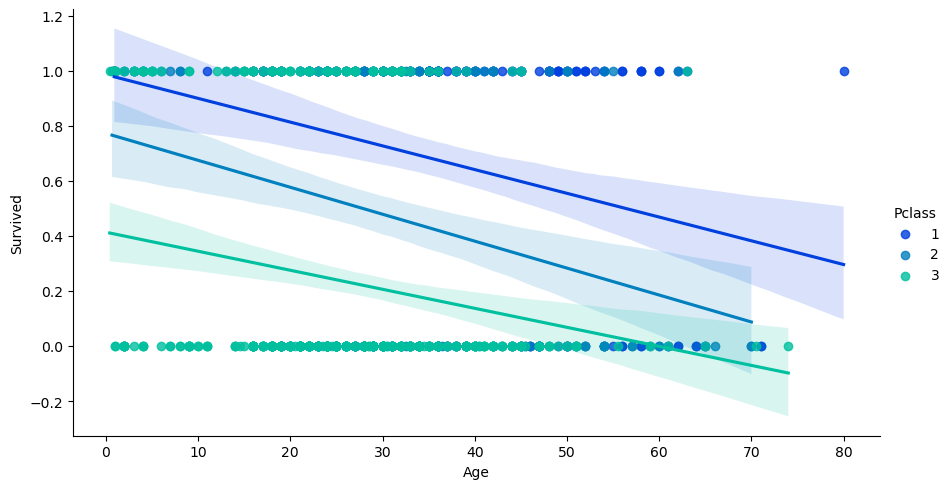

In [31]:
# class et age
sns.lmplot('Age','Survived',hue='Pclass',data=df_train,palette='winter',aspect=1.8)

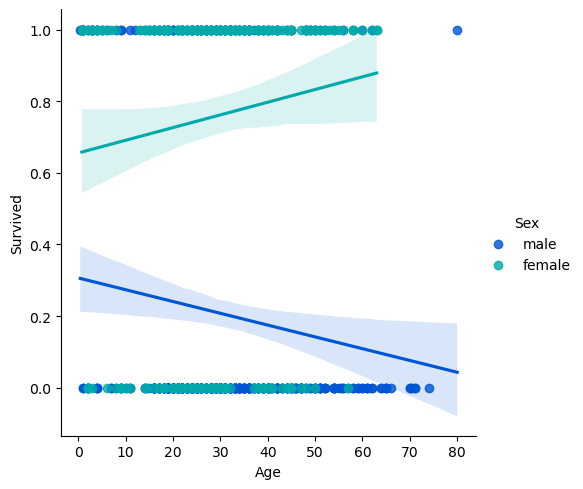

In [32]:
# how age and gender in relation to the survival
sns.lmplot('Age','Survived',hue='Sex',data=df_train,palette='winter')
# older female with most chance of survival

In [33]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
# compléter les cases d'Ages manquants avec la moyenne
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# age_values = {1:38, 2:30,3:24} df_train["Age"].fillna(df_train["Pclass"].map(age_values),implace = True)

In [36]:
#string to integer 

# remplacer les cases male avec 0, les cases female avec 1
df_train.loc[df_train["Sex"] == "male","Sex"] = 0
df_train.loc[df_train["Sex"] == "female","Sex"] = 1

In [37]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Situation
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S,female,With family
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C,male,Alone


In [38]:
# compléter les case d'embarquement manquants avec S
df_train["Embarked"] = df_train["Embarked"].fillna('S')

In [39]:
# remplacer les cases d'emparquement avec S=0, C=1, Q=2
df_train.loc[df_train["Embarked"] == "S", "Embarked"] = 0
df_train.loc[df_train["Embarked"] == "C", "Embarked"] = 1
df_train.loc[df_train["Embarked"] == "Q", "Embarked"] = 2

In [40]:
# calculer la coefficiant de la correlation¶
df_train.drop(["PassengerId"],axis=1,inplace=True) # PassengerId est unique pour tout les passagers, donc inutile 
cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId", "NameLength"]
train_corr = df_train.corr(method='pearson')
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'annot=False')

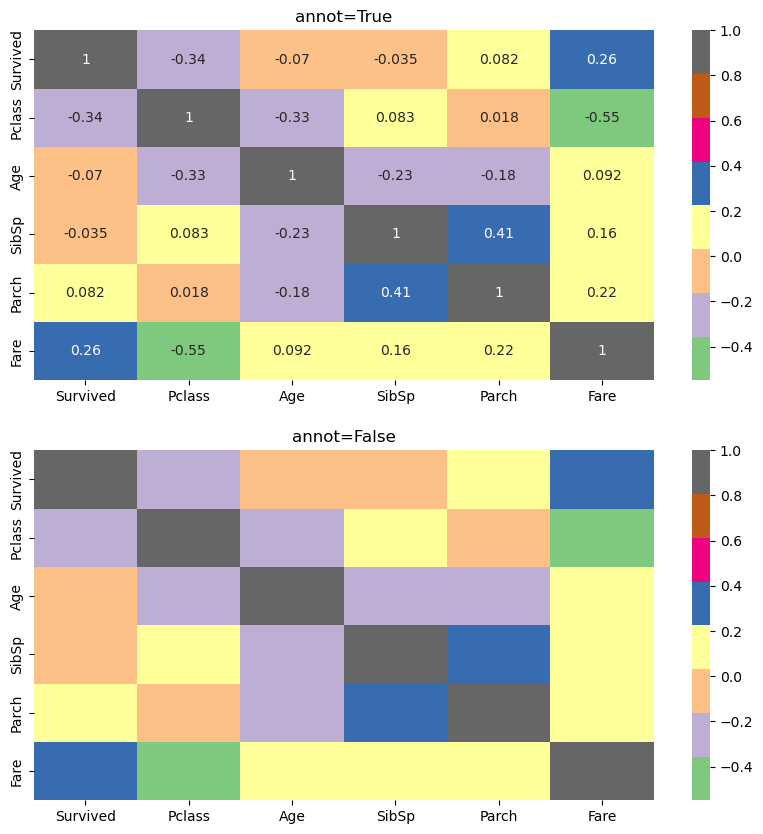

In [41]:
# Plot Heat map using Seaborn
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1,cmap="Accent")
sns.heatmap(train_corr,annot=False,ax=ax2,cmap="Accent")
ax1.set_title('annot=True')
ax2.set_title('annot=False')

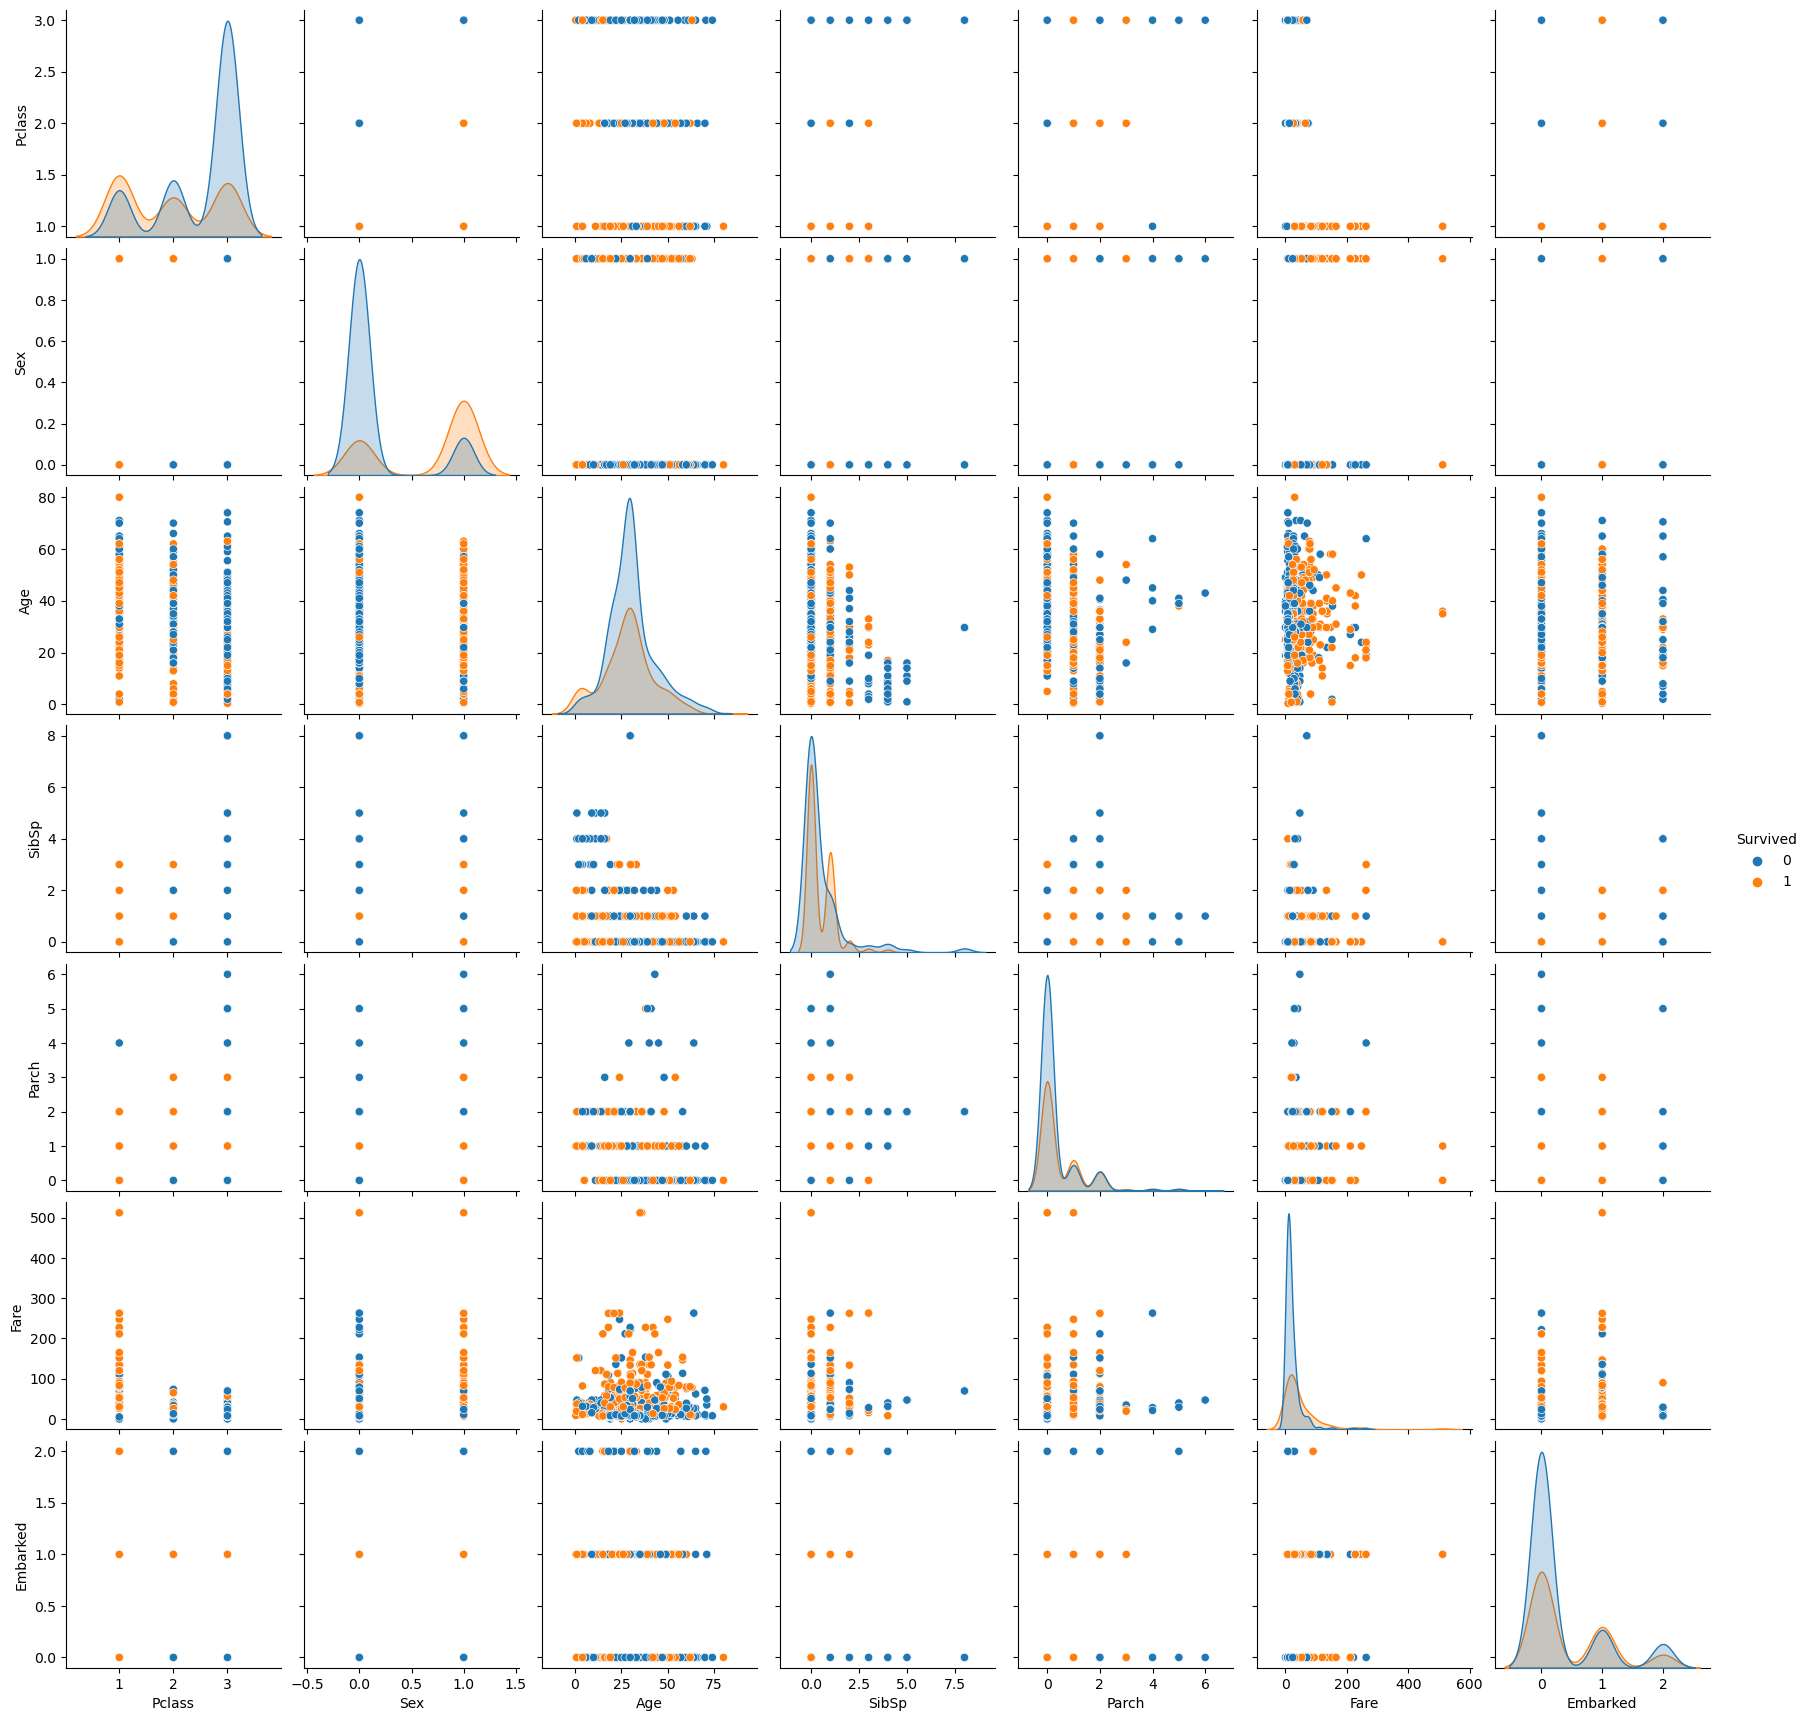

In [42]:
sns.pairplot(df_train, hue="Survived")

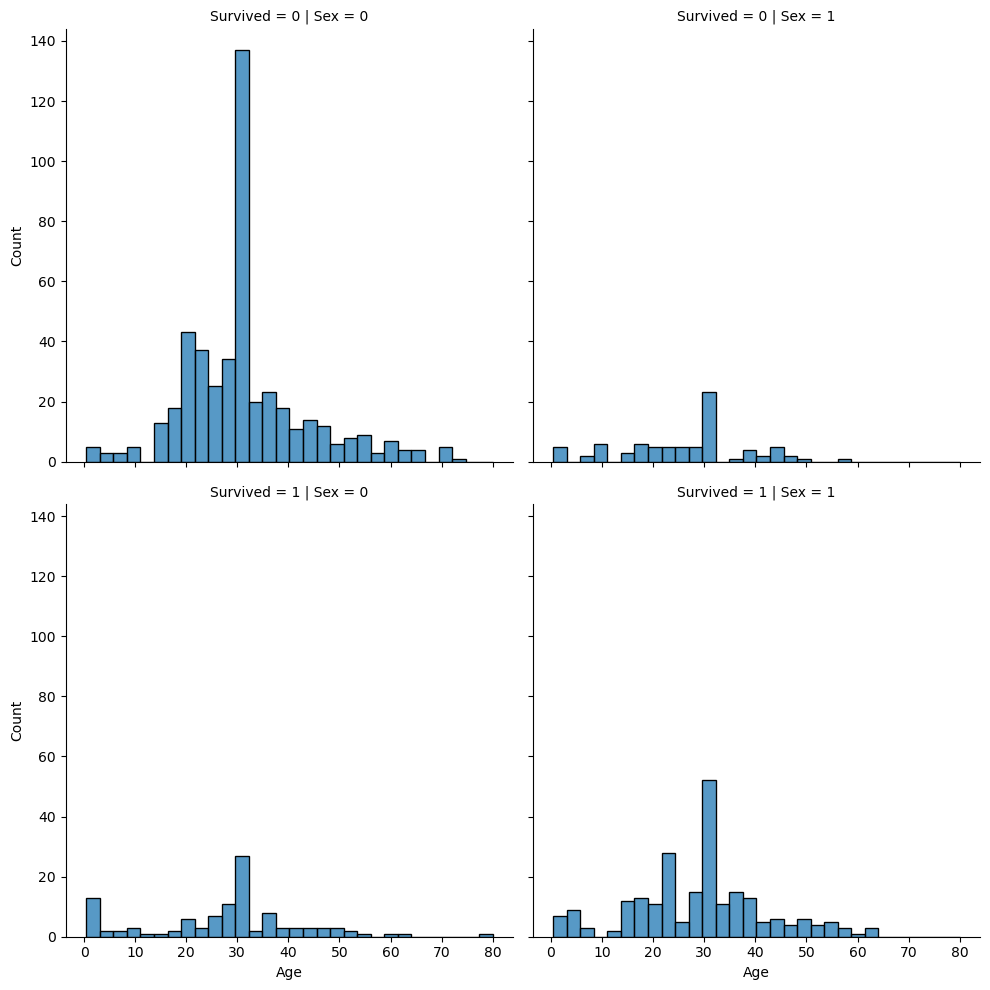

In [43]:
sns.displot(df_train, x="Age",col='Sex',row='Survived')

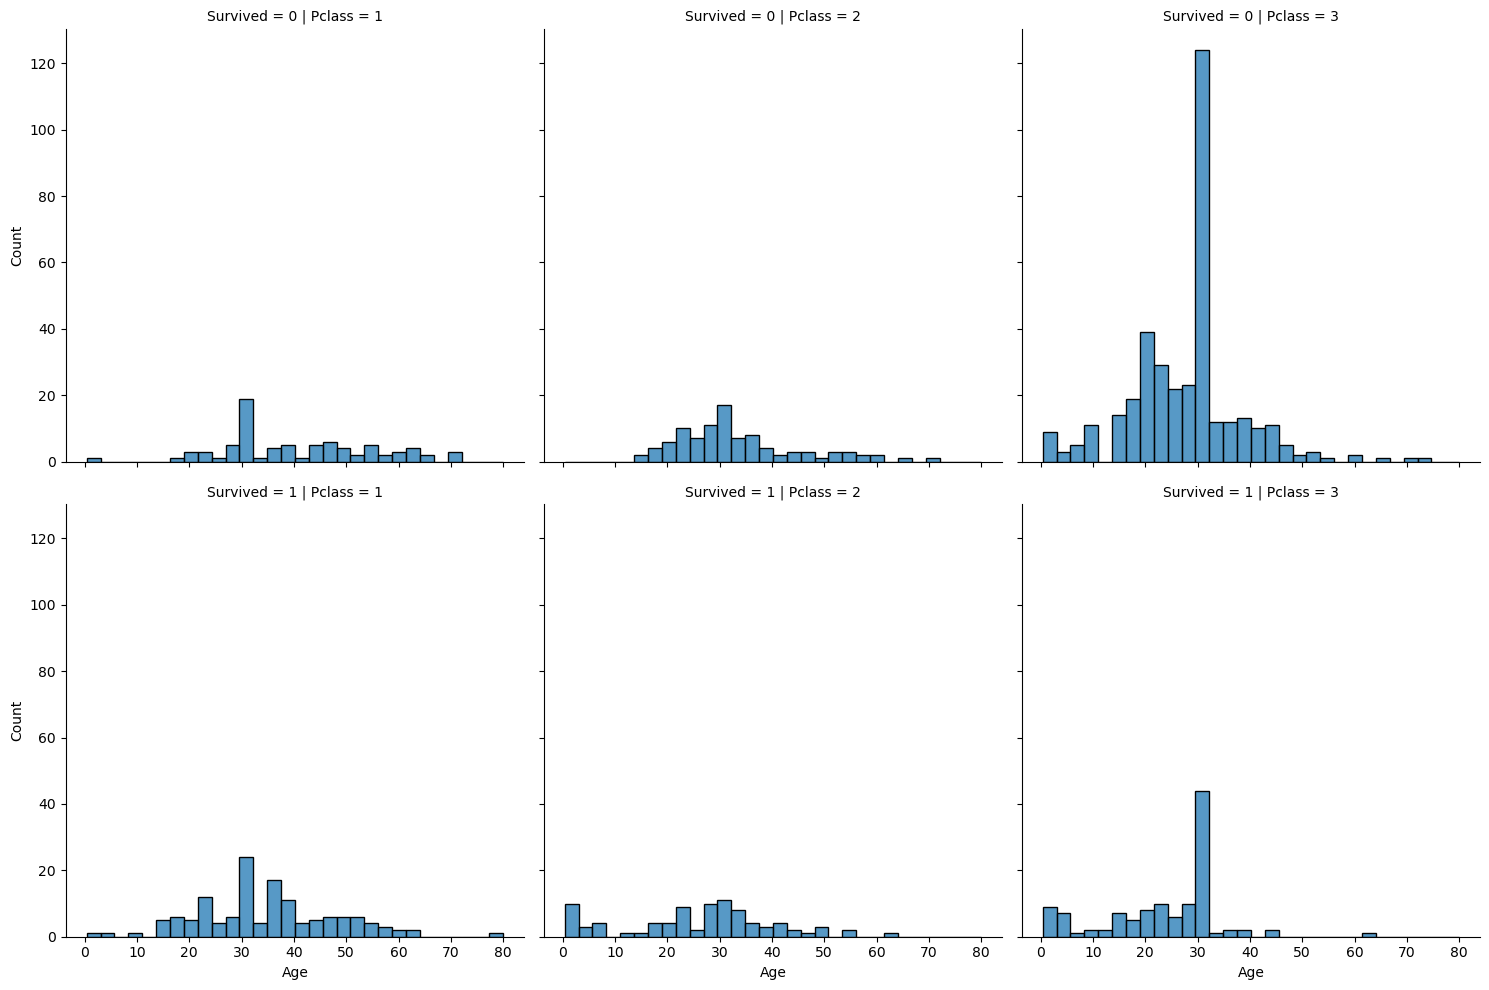

In [44]:
sns.displot(df_train, x="Age",col='Pclass',row='Survived')

# Préparations pour utiliser les modèles de ML

In [45]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full = concat_df(train, test)
full

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [46]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [47]:
full['Age'] = full['Age'].fillna(full['Age'].mean())
full['Fare'] = full['Fare'].fillna(full['Fare'].mean())
full['Cabin'] = full['Cabin'].fillna('U')
full['Embarked'] = full['Embarked'].fillna('S')

In [48]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        1309 non-null   object 
 2   Embarked     1309 non-null   object 
 3   Fare         1309 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# Construction des colonnes de classe familialle

In [49]:
familyDf = pd.DataFrame()

familyDf['FamilySize'] = full['Parch'] + full['SibSp'] + 1

familyDf['Family_Single'] = familyDf['FamilySize'].map(lambda s : 1 if s==1 else 0)
familyDf['Family_Small'] = familyDf['FamilySize'].map(lambda s : 1 if 2 <= s <= 4 else 0)
familyDf['Family_Large'] = familyDf['FamilySize'].map(lambda s : 1 if s>=5 else 0)

familyDf

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0
...,...,...,...,...
1304,1,1,0,0
1305,1,1,0,0
1306,1,1,0,0
1307,1,1,0,0


In [50]:
full = pd.concat([full,familyDf],axis = 1)
full

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,Family_Single,Family_Small,Family_Large
0,22.000000,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,0,1,0
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,0,1,0
2,26.000000,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,1,0,0
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,0,1,0
4,35.000000,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.881138,U,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,1,1,0,0
1305,39.000000,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,1,1,0,0
1306,38.500000,U,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,1,1,0,0
1307,29.881138,U,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,1,1,0,0


In [51]:
full.loc[full['Sex'] == 'male','Sex'] = int(1)
full.loc[full['Sex'] == 'female','Sex'] = int(0)
full.info()
full

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1309 non-null   float64
 1   Cabin          1309 non-null   object 
 2   Embarked       1309 non-null   object 
 3   Fare           1309 non-null   float64
 4   Name           1309 non-null   object 
 5   Parch          1309 non-null   int64  
 6   PassengerId    1309 non-null   int64  
 7   Pclass         1309 non-null   int64  
 8   Sex            1309 non-null   object 
 9   SibSp          1309 non-null   int64  
 10  Survived       891 non-null    float64
 11  Ticket         1309 non-null   object 
 12  FamilySize     1309 non-null   int64  
 13  Family_Single  1309 non-null   int64  
 14  Family_Small   1309 non-null   int64  
 15  Family_Large   1309 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 163.8+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,Family_Single,Family_Small,Family_Large
0,22.000000,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,0,1,0
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,2,0,1,0
2,26.000000,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,1,1,0,0
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,2,0,1,0
4,35.000000,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.881138,U,S,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,NaN,A.5. 3236,1,1,0,0
1305,39.000000,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,NaN,PC 17758,1,1,0,0
1306,38.500000,U,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,NaN,SOTON/O.Q. 3101262,1,1,0,0
1307,29.881138,U,S,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,NaN,359309,1,1,0,0


In [52]:
embarkedDf = pd.DataFrame()

embarkedDf = pd.get_dummies(full['Embarked'], prefix = 'Embarked')
embarkedDf

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [53]:
full = pd.concat([full,embarkedDf],axis=1)
full.drop('Embarked',axis = 1,inplace = True)
full

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,Family_Single,Family_Small,Family_Large,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,U,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,0,1,0,0,0,1
1,38.000000,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,2,0,1,0,1,0,0
2,26.000000,U,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,1,1,0,0,0,0,1
3,35.000000,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,2,0,1,0,0,0,1
4,35.000000,U,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.881138,U,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,NaN,A.5. 3236,1,1,0,0,0,0,1
1305,39.000000,C105,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,NaN,PC 17758,1,1,0,0,1,0,0
1306,38.500000,U,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,NaN,SOTON/O.Q. 3101262,1,1,0,0,0,0,1
1307,29.881138,U,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,NaN,359309,1,1,0,0,0,0,1


In [54]:
pclassDf = pd.DataFrame()

pclassDf = pd.get_dummies(full['Pclass'], prefix = 'Pclass')
pclassDf

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [55]:
full = pd.concat([full,pclassDf],axis = 1)

full.drop('Pclass',axis = 1,inplace = True)

# On commence à traiter le nom des passagers

In [56]:
def getTitle(name):
    str1 = name.split(',')[1] # Mr. Owen Harris
    str2 = str1.split('.')[0] # Mr
    str3 = str2.strip()
    return str3

In [57]:
titleDf = pd.DataFrame()
titleDf['Title'] = full['Name'].map(getTitle)

titleDf['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [58]:
title_mapDict = {
                    "Capt"    : "Officer",
                    "Col"     : "Officer",
                    "Major"   : "Officer",
                    "Jonkheer": "Royalty",
                    "Don"     : "Royalty",
                    "Sir"     : "Royalty",
                    "Dr"      : "Officer",
                    "Rev"     : "Officer",
                    "the Countess" : "Royalty",
                    "Dona"    : "Royalty",
                    "Mme"     : "Mrs",
                    "Mlle"    : "Miss",
                    "Ms"      : "Mrs",
                    "Mr"      : "Mr",
                    "Mrs"     : "Mrs",
                    "Miss"    : "Miss",
                    "Master"  : "Master",
                    "Lady"    : "Royalty"}

titleDf['Title'] = titleDf['Title'].map(title_mapDict)

In [59]:
titleDf = pd.get_dummies(titleDf['Title'])
titleDf

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1304,0,0,1,0,0,0
1305,0,0,0,0,0,1
1306,0,0,1,0,0,0
1307,0,0,1,0,0,0


In [60]:
full = pd.concat([full,titleDf],axis = 1)
full.drop(['Name'],axis = 1, inplace = True)
full

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,FamilySize,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,22.000000,U,7.2500,0,1,1,1,0.0,A/5 21171,2,...,1,0,0,1,0,0,1,0,0,0
1,38.000000,C85,71.2833,0,2,0,1,1.0,PC 17599,2,...,0,1,0,0,0,0,0,1,0,0
2,26.000000,U,7.9250,0,3,0,0,1.0,STON/O2. 3101282,1,...,1,0,0,1,0,1,0,0,0,0
3,35.000000,C123,53.1000,0,4,0,1,1.0,113803,2,...,1,1,0,0,0,0,0,1,0,0
4,35.000000,U,8.0500,0,5,1,0,0.0,373450,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.881138,U,8.0500,0,1305,1,0,NaN,A.5. 3236,1,...,1,0,0,1,0,0,1,0,0,0
1305,39.000000,C105,108.9000,0,1306,0,0,NaN,PC 17758,1,...,0,1,0,0,0,0,0,0,0,1
1306,38.500000,U,7.2500,0,1307,1,0,NaN,SOTON/O.Q. 3101262,1,...,1,0,0,1,0,0,1,0,0,0
1307,29.881138,U,8.0500,0,1308,1,0,NaN,359309,1,...,1,0,0,1,0,0,1,0,0,0


In [61]:
full['Cabin'].value_counts()

U                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [62]:
cabinDf = pd.DataFrame()

cabinDf['Cabin'] = full['Cabin'].map(lambda c : c[0])
cabinDf = pd.get_dummies(cabinDf['Cabin'], prefix = 'Cabin');

full.drop(['Cabin'],axis = 1 , inplace = True)
full = pd.concat([full,cabinDf],axis = 1)
full

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,FamilySize,Family_Single,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.000000,7.2500,0,1,1,1,0.0,A/5 21171,2,0,...,0,0,0,0,0,0,0,0,0,1
1,38.000000,71.2833,0,2,0,1,1.0,PC 17599,2,0,...,0,0,0,1,0,0,0,0,0,0
2,26.000000,7.9250,0,3,0,0,1.0,STON/O2. 3101282,1,1,...,0,0,0,0,0,0,0,0,0,1
3,35.000000,53.1000,0,4,0,1,1.0,113803,2,0,...,0,0,0,1,0,0,0,0,0,0
4,35.000000,8.0500,0,5,1,0,0.0,373450,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.881138,8.0500,0,1305,1,0,NaN,A.5. 3236,1,1,...,0,0,0,0,0,0,0,0,0,1
1305,39.000000,108.9000,0,1306,0,0,NaN,PC 17758,1,1,...,1,0,0,1,0,0,0,0,0,0
1306,38.500000,7.2500,0,1307,1,0,NaN,SOTON/O.Q. 3101262,1,1,...,0,0,0,0,0,0,0,0,0,1
1307,29.881138,8.0500,0,1308,1,0,NaN,359309,1,1,...,0,0,0,0,0,0,0,0,0,1


In [63]:
corrDf = full.corr()
corrDf

,Age,Fare,Parch,PassengerId,SibSp,Survived,FamilySize,Family_Single,Family_Small,Family_Large,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
Age,1.000000,0.171521,-0.130872,0.025731,-0.190747,-0.070323,-0.196996,0.116675,-0.038189,-0.161210,...,0.059466,0.125177,0.113458,0.167993,0.132886,0.106600,-0.072644,-0.085977,0.032461,-0.271918
Fare,0.171521,1.000000,0.221522,0.031416,0.160224,0.257307,0.226465,-0.274826,0.197281,0.170853,...,0.026214,0.020094,0.393743,0.401370,0.072737,0.073949,-0.037567,-0.022857,0.001179,-0.507197
Parch,-0.130872,0.221522,1.000000,0.008942,0.373587,0.081629,0.792296,-0.549022,0.248532,0.624627,...,-0.030197,-0.030707,0.073051,0.009601,-0.027385,0.001084,0.020481,0.058325,-0.012304,-0.036806
PassengerId,0.025731,0.031416,0.008942,1.000000,-0.055224,-0.005007,-0.031437,0.028546,0.002975,-0.063415,...,0.004400,-0.002831,0.015895,0.006092,0.000549,-0.008136,0.000306,-0.045949,-0.023049,0.000208
SibSp,-0.190747,0.160224,0.373587,-0.055224,1.000000,-0.035322,0.861952,-0.591077,0.253590,0.699681,...,-0.010787,-0.039808,-0.011569,0.048616,-0.015727,-0.027180,-0.008619,0.006015,-0.013247,0.009064
Survived,-0.070323,0.257307,0.081629,-0.005007,-0.035322,1.000000,0.016639,-0.203367,0.279855,-0.125147,...,0.033391,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.316912
FamilySize,-0.196996,0.226465,0.792296,-0.031437,0.861952,0.016639,1.000000,-0.688864,0.302640,0.801623,...,-0.023600,-0.042967,0.032318,0.037226,-0.025313,-0.017285,0.005525,0.035835,-0.015438,-0.014155
Family_Single,0.116675,-0.274826,-0.549022,0.028546,-0.591077,-0.203367,-0.688864,1.000000,-0.873398,-0.318944,...,0.008761,0.045227,-0.087912,-0.137498,-0.074310,-0.042535,0.004055,-0.076397,0.022411,0.175812
Family_Small,-0.038189,0.197281,0.248532,0.002975,0.253590,0.279855,0.302640,-0.873398,1.000000,-0.183007,...,-0.000073,-0.029546,0.084268,0.141925,0.102432,0.068007,0.012756,0.087471,-0.019574,-0.211367
Family_Large,-0.161210,0.170853,0.624627,-0.063415,0.699681,-0.125147,0.801623,-0.318944,-0.183007,1.000000,...,-0.017542,-0.033799,0.013470,0.001362,-0.049336,-0.046485,-0.033009,-0.016008,-0.007148,0.056438


In [64]:
corrDf['Survived'].sort_values(ascending = False)

Survived         1.000000
Mrs              0.344935
Miss             0.332795
Pclass_1         0.285904
Family_Small     0.279855
Fare             0.257307
Cabin_B          0.175095
Embarked_C       0.168240
Cabin_D          0.150716
Cabin_E          0.145321
Cabin_C          0.114652
Pclass_2         0.093349
Master           0.085221
Parch            0.081629
Cabin_F          0.057935
Royalty          0.033391
Cabin_A          0.022287
FamilySize       0.016639
Cabin_G          0.016040
Embarked_Q       0.003650
PassengerId     -0.005007
Cabin_T         -0.026456
Officer         -0.031316
SibSp           -0.035322
Age             -0.070323
Family_Large    -0.125147
Embarked_S      -0.149683
Family_Single   -0.203367
Cabin_U         -0.316912
Pclass_3        -0.322308
Mr              -0.549199
Name: Survived, dtype: float64

In [65]:
# Ici, on a trouvé qu'il y 8 features importants: Age, Sex, titleDf, pclassDf, familyDf, Fare, cabinDf, embarkedDf
full_X = pd.concat([titleDf,pclassDf,familyDf,full['Fare'],cabinDf,embarkedDf,full['Sex'],full['Age']],axis = 1)
full_X

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,FamilySize,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex,Age
0,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,1,0,0,1,1,22.000000
1,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,1,0,0,0,38.000000
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,26.000000
3,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,0,1,0,35.000000
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,1,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,1,29.881138
1305,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,39.000000
1306,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,1,38.500000
1307,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,1,29.881138


## To continue...

You may find more correlations hints that could help the model to predict which passenger survised or not.

# Machine learning Model

Examples of models that can be used:

- **Linear Models**
-- Ordinary Least Squares
-- Ridge regression and classification
-- Lasso
-- Perceptron

- **Support Vector Machines**
- **Nearest Neighbors**
-- Unsupervised Nearest Neighbors
-- Nearest Neighbors Classification
- **Gaussian Processes**
- **Naive Bayes**
- **Decision Trees**
- **Ensemble methods**
-- Forests of randomized trees
-- AdaBoost
-- Gradient Tree Boosting
-- Histogram-Based Gradient Boosting
- **Neural network models**
-- Multi-layer Perceptron


More inforation and suggested library to use: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
sourceRow = 891

# On sépare train et test
source_X = full_X.loc[0:sourceRow-1,:]
source_y = full.loc[0:sourceRow-1,'Survived']

pred_X = full_X.loc[sourceRow: ,:]
print("nombre de rangs dans source_X :",source_X.shape[0])
print("nombre de rangs dans source_y :",source_y.shape[0])
print("nombre de rangs dans pred_X :",pred_X.shape[0])

nombre de rangs dans source_X : 891
nombre de rangs dans source_y : 891
nombre de rangs dans pred_X : 418


In [77]:
train_X,test_X,train_y,test_y = train_test_split(source_X,source_y,train_size = 0.3)

print("source_X :",source_X.shape[0],
      "train_X :",train_X.shape[0],
      "test_X :",test_X.shape[0])

print("source_y :",source_y.shape[0],
      "train_y :",train_y.shape[0],
      "test_y :",test_y.shape[0])

source_X : 891 train_X : 267 test_X : 624
source_y : 891 train_y : 267 test_y : 624


# Random Forest

In [99]:
model = RandomForestClassifier(n_estimators=50)
model.fit(source_X,source_y)

RandomForestClassifier(n_estimators=50)

In [100]:
model.score(test_X,test_y)

1.0

In [101]:
pred_Y = model.predict(pred_X)
X_train_prediction = model.predict(train_X)
acc = accuracy_score(train_y,X_train_prediction)
print(pred_Y)
print("acc = ",acc)

[0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.

In [102]:
pred_Y = pred_Y.astype(int)
passenger_id = full.loc[sourceRow: ,'PassengerId']
predDf = pd.DataFrame({'PassengerId' : passenger_id,
                      'Survived' : pred_Y})
predDf

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,1
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [103]:
predDf.to_csv('submission.csv', index=False)

# Visualization Web App

Propose a web interface that allow any usert to interact with data and discover insight. 

You have to use the following tools:
https://plotly.com/dash/

Examples of webapp: https://dash.gallery/Portal/